In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Print the current working directory
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is C:\Users\Pranay\Projects\GitHub\Capstone_II


In [3]:
#List files in current working directory
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'bank-additional',
 'Capstone II Problem Statement [PRANAY].pptx',
 'Capstone Two - Project Proposal.docx',
 'Capstone Two Project Ideas and Proposal.docx',
 'data',
 'figures',
 'models',
 'Notebook_Steptwo.ipynb',
 'README.md',
 'Untitled.ipynb']

In [4]:
#Create a subfolder in Project Directory
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('figures'):
    os.makedirs('figures')
if not os.path.exists('models'):
    os.makedirs('models')

In [5]:
#Get Current working directory after creating above subfolders
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'bank-additional',
 'Capstone II Problem Statement [PRANAY].pptx',
 'Capstone Two - Project Proposal.docx',
 'Capstone Two Project Ideas and Proposal.docx',
 'data',
 'figures',
 'models',
 'Notebook_Steptwo.ipynb',
 'README.md',
 'Untitled.ipynb']

In [6]:
#Load the data from CSV
df=pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';',header=None,low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [7]:
#Set First Row as columns 
df.columns=df.iloc[0]
df.drop(df.index[0],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
#Get the size of data
df.shape

(41188, 21)

<B>Data Types</B>

In [9]:
#Get datatypes
df.dtypes

0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [10]:
#Change to relevant datatype
cols=['age','duration','campaign','pdays','previous']
cols1=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df[cols] = df[cols].astype(int) 
df[cols1] = df[cols1].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int32  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
#count of unique values for every column, regardless of data type.
pd.Series({col: len(pd.unique(df[col])) for col in df})

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [12]:
#percent of unique values per column
pd.Series({col: df[col].nunique()/len(df[col])*100 for col in df})

age               0.189376
job               0.029135
marital           0.009712
education         0.019423
default           0.007284
housing           0.007284
loan              0.007284
contact           0.004856
month             0.024279
day_of_week       0.012139
duration          3.748665
campaign          0.101971
pdays             0.065553
previous          0.019423
poutcome          0.007284
emp.var.rate      0.024279
cons.price.idx    0.063125
cons.conf.idx     0.063125
euribor3m         0.767214
nr.employed       0.026707
y                 0.004856
dtype: float64

In [13]:
#Range of values using the aggregate function
df.agg(['min','max']).T

,min,max
age,17,98
job,admin.,unknown
marital,divorced,unknown
education,basic.4y,unknown
default,no,yes
housing,no,yes
loan,no,yes
contact,cellular,telephone
month,apr,sep
day_of_week,fri,wed


In [14]:
#Review the numeric dataset's summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


In [15]:
dfyes=df[df['y']=='yes']
dfyes.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
76,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
84,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
130,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
140,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


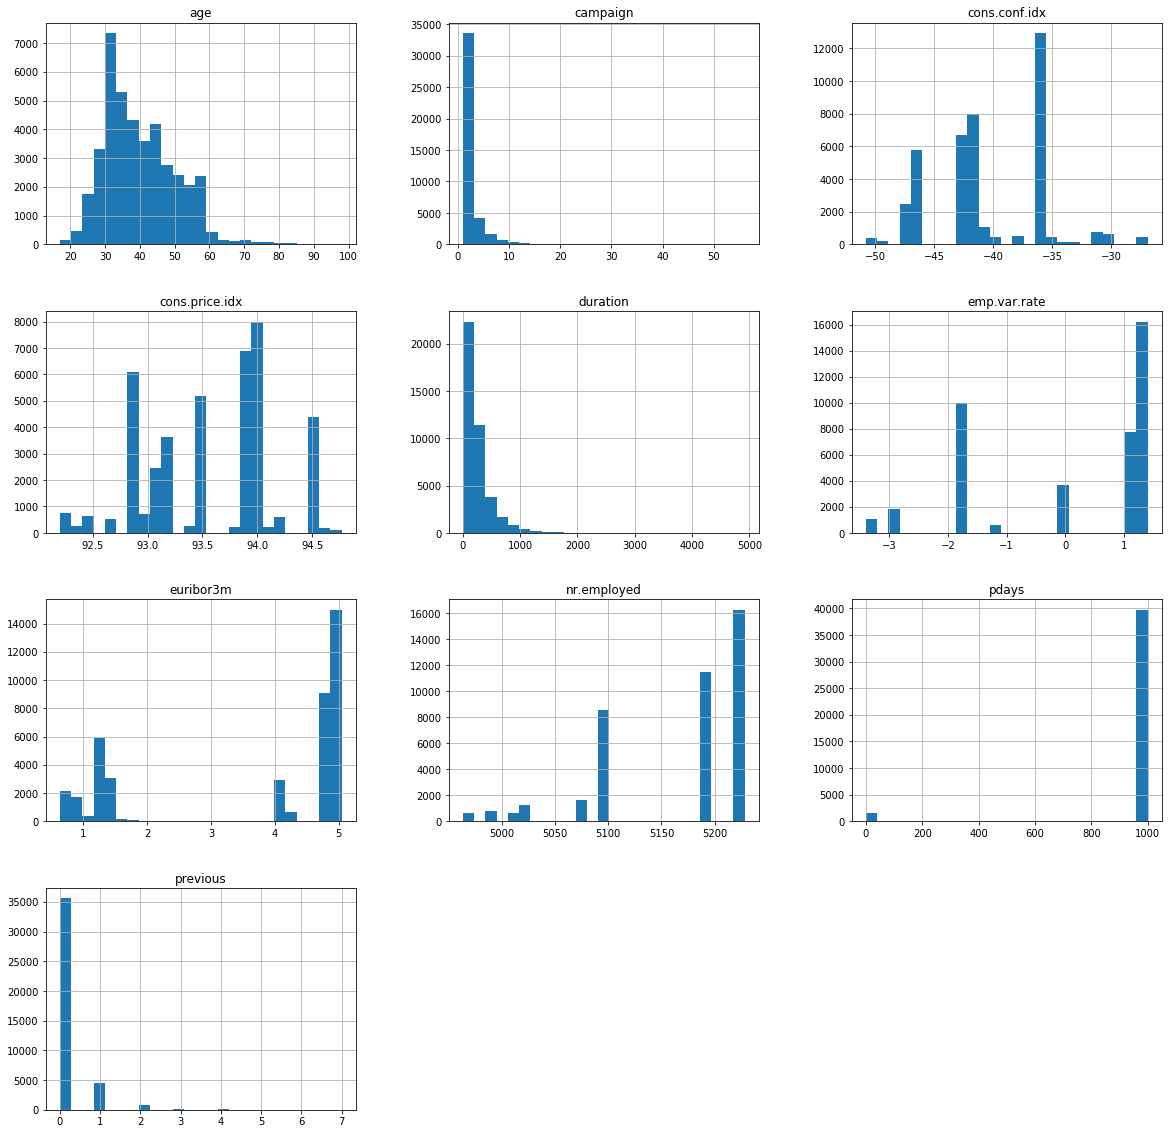

In [34]:
hist = df.hist(bins=25,figsize =(20,20))

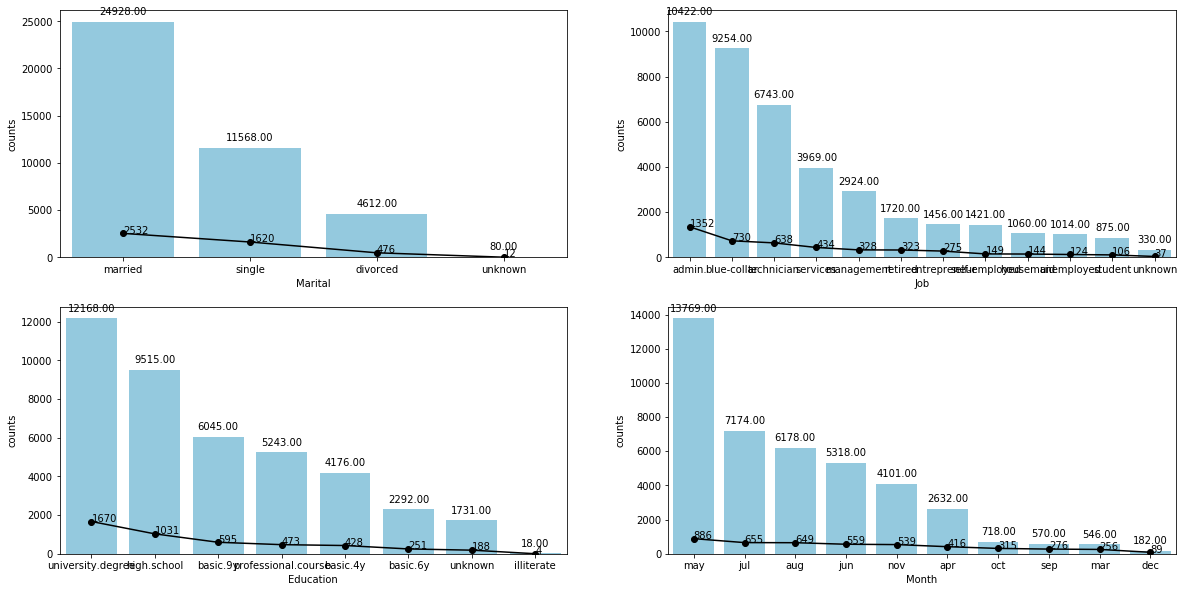

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20, 10))
x_1 = pd.DataFrame(df.marital.value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.marital)
x_2 = pd.DataFrame(dfyes.marital.value_counts())
names_2 = list(x_2.index)
values_2 = list(x_2.marital)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Marital', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

x_1 = pd.DataFrame(df.job.value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
x_2 = pd.DataFrame(dfyes.job.value_counts())
names_2 = list(x_2.index)
values_2 = list(x_2.job)
ax2.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax2.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax2)
splot.set(xlabel= 'Job', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.education.value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
x_2 = pd.DataFrame(dfyes.education.value_counts())
names_2 = list(x_2.index)
values_2 = list(x_2.education)
ax3.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax3.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax3)
splot.set(xlabel= 'Education', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.month.value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.month)
x_2 = pd.DataFrame(dfyes.month.value_counts())
names_2 = list(x_2.index)
values_2 = list(x_2.month)
ax4.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax4.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax4)
splot.set(xlabel= 'Month', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
                        

In [17]:
#default occurs when a borrower is unable to make timely payments, misses payments, or avoids
#or stops making payments entirely on interest or principal owed
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
#Since one has no housing loan or no personal loan, ther will be no defauls
df.loc[((df['loan'] == 'no') & (df['housing']=='no')& (df['default']=='unknown')),'default'] = 'no'
df['default'].value_counts()

no         36045
unknown     5140
yes            3
Name: default, dtype: int64

In [19]:
#Check counts for qualification of admin jobs 
df[(df['job'] =='admin.')]['education'].value_counts() 

university.degree      5753
high.school            3329
basic.9y                499
professional.course     363
unknown                 249
basic.6y                151
basic.4y                 77
illiterate                1
Name: education, dtype: int64

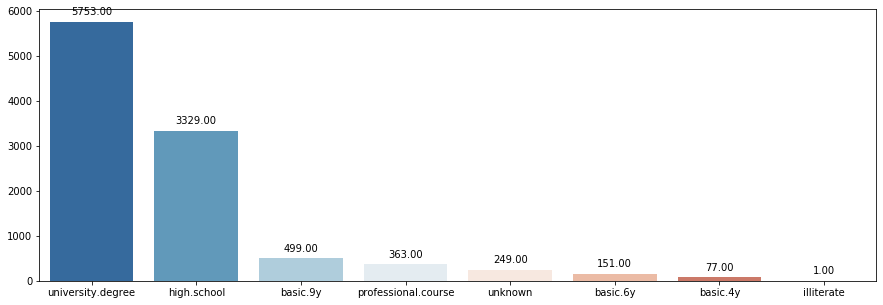

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='admin.']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [24]:
df.loc[((df['job'] == 'admin.') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='admin.')]['education'].value_counts() 

university.degree      6002
high.school            3329
basic.9y                499
professional.course     363
basic.6y                151
basic.4y                 77
illiterate                1
Name: education, dtype: int64

In [25]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

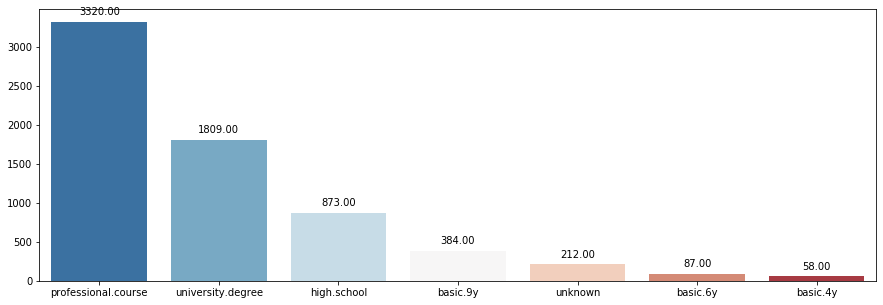

In [27]:
f, ax = plt.subplots(figsize=(15,5))
x_1 = pd.DataFrame(df[df['job']=='technician']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [29]:
df.loc[((df['job'] == 'technician') & (df['education']=='unknown')),'education'] = 'professional.course'
df[(df['job'] =='technician')]['education'].value_counts() 

professional.course    3532
university.degree      1809
high.school             873
basic.9y                384
basic.6y                 87
basic.4y                 58
Name: education, dtype: int64

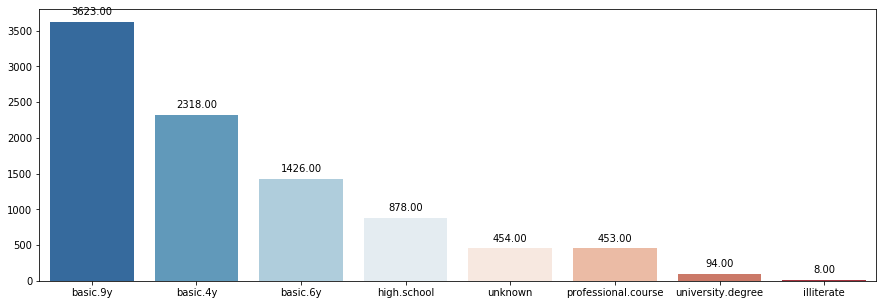

In [30]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='blue-collar']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [31]:
df.loc[((df['job'] == 'blue-collar') & (df['education']=='unknown')),'education'] = 'basic.9y'
df[(df['job'] =='blue-collar')]['education'].value_counts() 

basic.9y               4077
basic.4y               2318
basic.6y               1426
high.school             878
professional.course     453
university.degree        94
illiterate                8
Name: education, dtype: int64

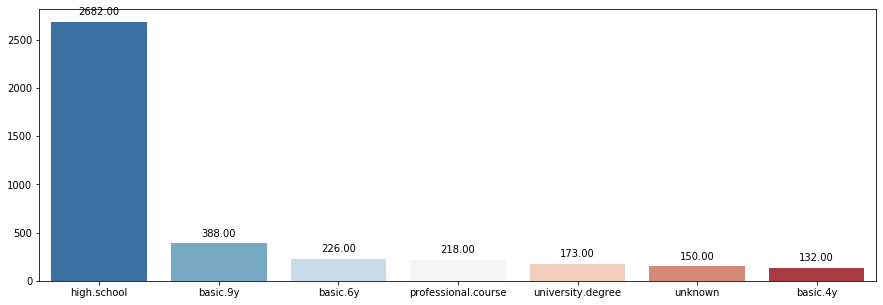

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='services']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [33]:
df.loc[((df['job'] == 'services') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='services')]['education'].value_counts() 

high.school            2832
basic.9y                388
basic.6y                226
professional.course     218
university.degree       173
basic.4y                132
Name: education, dtype: int64

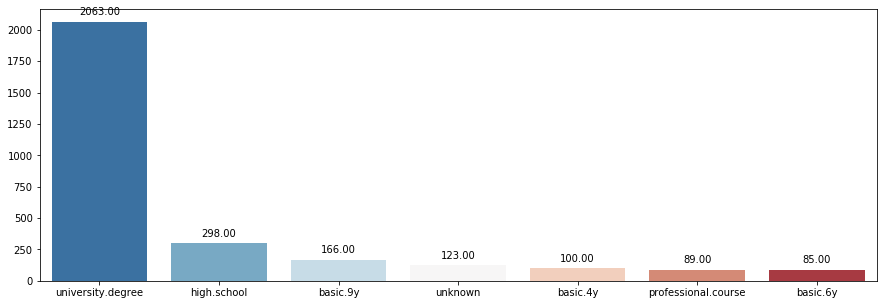

In [35]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='management']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [36]:
df.loc[((df['job'] == 'management') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='management')]['education'].value_counts() 

university.degree      2186
high.school             298
basic.9y                166
basic.4y                100
professional.course      89
basic.6y                 85
Name: education, dtype: int64

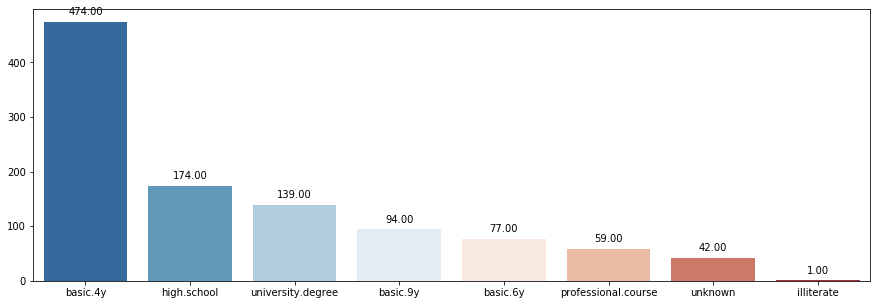

In [37]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='housemaid']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [38]:
df.loc[((df['job'] == 'housemaid') & (df['education']=='unknown')),'education'] = 'basic.4y'
df[(df['job'] =='housemaid')]['education'].value_counts() 

basic.4y               516
high.school            174
university.degree      139
basic.9y                94
basic.6y                77
professional.course     59
illiterate               1
Name: education, dtype: int64

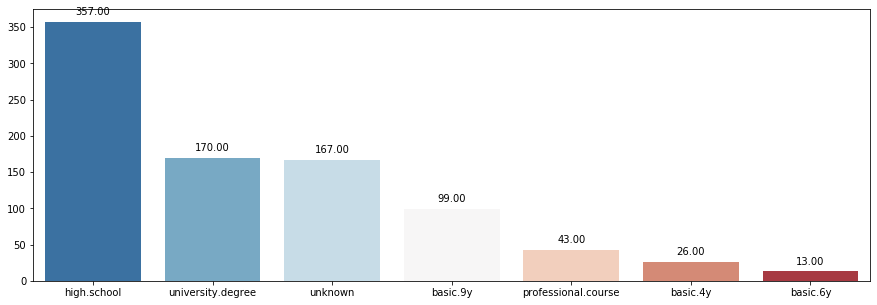

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='student']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, palette="RdBu_r")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [43]:
df.loc[((df['job'] == 'student') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='student')]['education'].value_counts() 

high.school            524
university.degree      170
basic.9y                99
professional.course     43
basic.4y                26
basic.6y                13
Name: education, dtype: int64